# Task 1

We have the min and max temperatures in a city in India for each months of the year. We would like to find a function to describe this and show it graphically , the dataset given below .

Fitting it to the periodic function

Plot the fit


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame({'Max' : [39,41,43,47,49,51,45,38,37,29,27,25] ,
                    'Min' : [21,23,27,28,32,35,31,28,21,19,17,18]})
df.head()

,Max,Min
0,39,21
1,41,23
2,43,27
3,47,28
4,49,32


# Fitting it to the periodic function

In [3]:
from scipy import optimize

In [4]:
months = np.arange(12)

In [5]:
def yearly_temps(times , avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi/times.max()))


In [6]:
res_max , cov_max = optimize.curve_fit(yearly_temps , months , df['Max'] , [40 , 20 , 0])

res_min , cov_min = optimize.curve_fit(yearly_temps , months , df['Min'] , [-40,20 , 0])

print(res_max)
print(res_min)

[ 39.10062829 -11.0872493    2.10332481]
[24.87112259 -7.8989966   1.60673368]


# Plot Min And Max Temperature

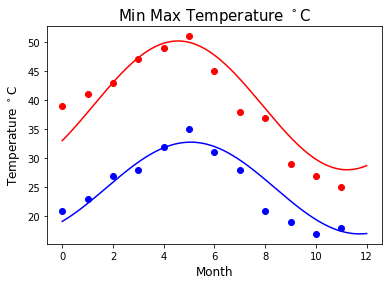

In [7]:
days = np.linspace(0,12, num = 365)
plt.plot(months , df['Max'] , 'ro')
plt.plot(days , yearly_temps(days , *res_max) , 'r-')
plt.plot(months , df['Min'] , 'bo')
plt.plot(days , yearly_temps(days , *res_min), 'b-')
plt.xlabel("Month" , fontsize = 12)
plt.ylabel("Temperature $^\circ$C" , fontsize = 12)
plt.title('Min Max Temperature $^\circ$C' , fontsize=15)
plt.show()